CONSTRUCCIÓN DE DATASET - CARTERA SECTOR ENERGÉTICO
Analista: Juan Serrano - YPF S.A.

1. SELECCIÓN Y JUSTIFICACIÓN DE EMPRESAS COMPARABLES
------------------------------------------------------------

• YPF - YPF S.A. (ADR)
  País: Argentina
  Sector: Energía - Petróleo y Gas Integrado
  Mercado: NYSE (ADR)
  Tipo: ADR - American Depositary Receipt
  Ratio ADR: 1 ADR = 1 Acción Ordinaria
  Justificación: Empresa objetivo - Líder energético argentino

• PAM - Pampa Energía S.A. (ADR)
  País: Argentina
  Sector: Energía - Generación Eléctrica y Petróleo
  Mercado: NYSE (ADR)
  Tipo: ADR - American Depositary Receipt
  Ratio ADR: 25 ADRs = 1 Acción Ordinaria
  Justificación: Mismo país origen, sector energético diversificado

• VIST - Vista Energy S.A.B. de C.V.
  País: México (operaciones en Argentina)
  Sector: Energía - Exploración y Producción
  Mercado: NYSE
  Tipo: Acción Ordinaria
  Justificación: Enfoque en Vaca Muerta, comparable en E&P

• EC - Ecopetrol S.A. (ADR)
  País: Colom

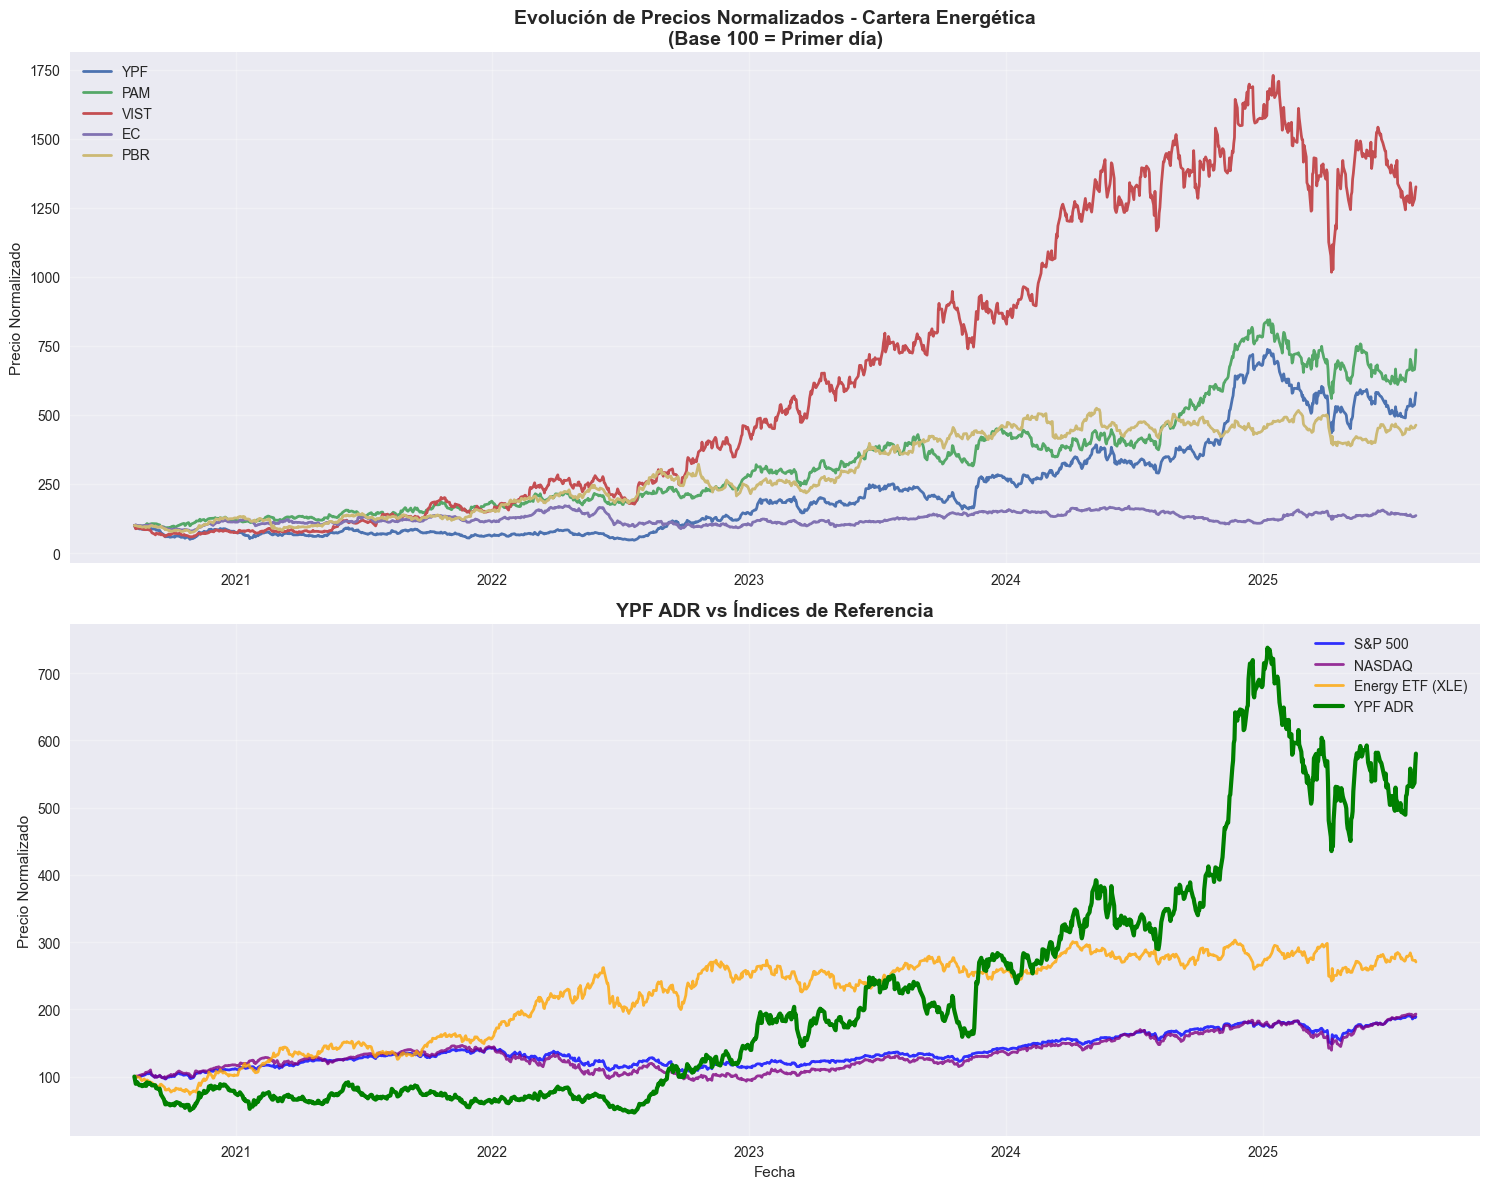



7. DOCUMENTACIÓN DE FUENTES Y METODOLOGÍA
------------------------------------------------------------

FUENTES DE DATOS:
• Yahoo Finance (yfinance): Datos históricos de precios y volúmenes
• Período: Últimos 5 años (aproximadamente)
• Frecuencia: Diaria
• Moneda: USD (Dólares estadounidenses) - ADRs en NYSE

METODOLOGÍA DE LIMPIEZA:
1. Eliminación de registros con valores nulos
2. Detección de outliers (cambios > 50% diarios)
3. Verificación de consistencia temporal
4. Sincronización de fechas entre todos los activos

CRITERIOS DE SELECCIÓN DE EMPRESAS COMPARABLES:
• YPF (ADR): Empresa objetivo - Líder integrado argentino
• PAM (ADR): Diversificación energética, mismo país origen
• VIST: Especialización E&P, operaciones en Argentina
• EC (ADR): Líder regional integrado, modelo similar
• PBR (ADR): Mayor referencia regional del sector

VENTAJAS DEL USO DE ADRs:
• Homogeneidad de moneda (USD) para análisis comparativo
• Mayor liquidez y disponibilidad de datos históricos
• Eliminación

In [1]:
# =============================================================================
# INFORME DE ANÁLISIS FINANCIERO - YPF S.A.
# Analista: Juan Serrano
# Empresa: YPF S.A. (YPF.BA)
# Sector: Energía - Petróleo y Gas
# =============================================================================

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configuración inicial
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("="*80)
print("CONSTRUCCIÓN DE DATASET - CARTERA SECTOR ENERGÉTICO")
print("Analista: Juan Serrano - YPF S.A.")
print("="*80)

# =============================================================================
# 1. DEFINICIÓN DE LA CARTERA Y JUSTIFICACIÓN
# =============================================================================

print("\n1. SELECCIÓN Y JUSTIFICACIÓN DE EMPRESAS COMPARABLES")
print("-" * 60)

# Diccionario con información de las empresas (ADRs en NYSE)
empresas_info = {
    'YPF': {
        'nombre': 'YPF S.A. (ADR)',
        'pais': 'Argentina',
        'sector': 'Energía - Petróleo y Gas Integrado',
        'mercado': 'NYSE (ADR)',
        'tipo_valor': 'ADR - American Depositary Receipt',
        'ratio_adr': '1 ADR = 1 Acción Ordinaria',
        'justificacion': 'Empresa objetivo - Líder energético argentino'
    },
    'PAM': {
        'nombre': 'Pampa Energía S.A. (ADR)',
        'pais': 'Argentina',
        'sector': 'Energía - Generación Eléctrica y Petróleo',
        'mercado': 'NYSE (ADR)',
        'tipo_valor': 'ADR - American Depositary Receipt',
        'ratio_adr': '25 ADRs = 1 Acción Ordinaria',
        'justificacion': 'Mismo país origen, sector energético diversificado'
    },
    'VIST': {
        'nombre': 'Vista Energy S.A.B. de C.V.',
        'pais': 'México (operaciones en Argentina)',
        'sector': 'Energía - Exploración y Producción',
        'mercado': 'NYSE',
        'tipo_valor': 'Acción Ordinaria',
        'ratio_adr': 'N/A',
        'justificacion': 'Enfoque en Vaca Muerta, comparable en E&P'
    },
    'EC': {
        'nombre': 'Ecopetrol S.A. (ADR)',
        'pais': 'Colombia',
        'sector': 'Energía - Petróleo y Gas Integrado',
        'mercado': 'NYSE (ADR)',
        'tipo_valor': 'ADR - American Depositary Receipt',
        'ratio_adr': '20 ADRs = 1 Acción Ordinaria',
        'justificacion': 'Líder regional, modelo de negocio similar'
    },
    'PBR': {
        'nombre': 'Petróleo Brasileiro S.A. - Petrobras (ADR)',
        'pais': 'Brasil',
        'sector': 'Energía - Petróleo y Gas Integrado',
        'mercado': 'NYSE (ADR)',
        'tipo_valor': 'ADR - American Depositary Receipt',
        'ratio_adr': '2 ADRs = 1 Acción Ordinaria',
        'justificacion': 'Mayor petrolera regional, referencia del sector'
    }
}

# Mostrar justificación detallada
for ticker, info in empresas_info.items():
    print(f"\n• {ticker} - {info['nombre']}")
    print(f"  País: {info['pais']}")
    print(f"  Sector: {info['sector']}")
    print(f"  Mercado: {info['mercado']}")
    print(f"  Tipo: {info['tipo_valor']}")
    if info['ratio_adr'] != 'N/A':
        print(f"  Ratio ADR: {info['ratio_adr']}")
    print(f"  Justificación: {info['justificacion']}")

# =============================================================================
# 2. OBTENCIÓN DE DATOS HISTÓRICOS
# =============================================================================

print("\n\n2. OBTENCIÓN DE DATOS HISTÓRICOS")
print("-" * 60)

# Definir período de análisis (últimos 5 años)
fecha_fin = datetime.now()
fecha_inicio = fecha_fin - timedelta(days=5*365)

print(f"Período de análisis: {fecha_inicio.strftime('%Y-%m-%d')} a {fecha_fin.strftime('%Y-%m-%d')}")

# Tickers de la cartera (todos ADRs en NYSE - USD)
tickers_cartera = ['YPF', 'PAM', 'VIST', 'EC', 'PBR']

# Índices de referencia
indices_referencia = {
    '^GSPC': 'S&P 500 (Referencia Global)',
    '^IXIC': 'NASDAQ Composite',
    'XLE': 'Energy Select Sector SPDR Fund (ETF Energía)'
}

print(f"\nEmpresas en la cartera (ADRs): {len(tickers_cartera)}")
print("Tickers:", ', '.join(tickers_cartera))
print("Moneda: USD (Dólares estadounidenses)")
print("Mercado: NYSE - New York Stock Exchange")

# Función para obtener datos
def obtener_datos_historicos(tickers, fecha_inicio, fecha_fin):
    """
    Obtiene datos históricos de precios para una lista de tickers
    """
    datos = {}
    errores = []

    for ticker in tickers:
        try:
            print(f"Descargando datos para {ticker}...")
            stock = yf.Ticker(ticker)
            hist = stock.history(start=fecha_inicio, end=fecha_fin)

            if not hist.empty:
                datos[ticker] = hist
                print(f"  ✓ {ticker}: {len(hist)} registros obtenidos")
            else:
                errores.append(f"{ticker}: No se encontraron datos")
                print(f"  ✗ {ticker}: No se encontraron datos")

        except Exception as e:
            errores.append(f"{ticker}: {str(e)}")
            print(f"  ✗ {ticker}: Error - {str(e)}")

    return datos, errores

# Obtener datos de la cartera
print("\nDescargando datos de la cartera...")
datos_cartera, errores_cartera = obtener_datos_historicos(tickers_cartera, fecha_inicio, fecha_fin)

# Obtener datos de índices de referencia
print("\nDescargando índices de referencia...")
datos_indices, errores_indices = obtener_datos_historicos(list(indices_referencia.keys()), fecha_inicio, fecha_fin)

# =============================================================================
# 3. LIMPIEZA Y PREPARACIÓN DE DATOS
# =============================================================================

print("\n\n3. LIMPIEZA Y PREPARACIÓN DE DATOS")
print("-" * 60)

def limpiar_datos(datos_dict):
    """
    Limpia y prepara los datos históricos
    """
    datos_limpios = {}

    for ticker, data in datos_dict.items():
        if data is not None and not data.empty:
            # Eliminar filas con valores nulos
            data_clean = data.dropna()

            # Verificar consistencia de datos
            if len(data_clean) > 0:
                # Eliminar outliers extremos (cambios mayores al 50% en un día)
                pct_change = data_clean['Close'].pct_change()
                outliers = abs(pct_change) > 0.5

                if outliers.any():
                    print(f"  Outliers detectados en {ticker}: {outliers.sum()} registros")
                    # Mantener los datos pero marcar para revisión

                datos_limpios[ticker] = data_clean
                print(f"  ✓ {ticker}: {len(data_clean)} registros limpios")
            else:
                print(f"  ✗ {ticker}: Sin datos válidos después de limpieza")

    return datos_limpios

# Limpiar datos
datos_cartera_limpios = limpiar_datos(datos_cartera)
datos_indices_limpios = limpiar_datos(datos_indices)

# =============================================================================
# 4. CREACIÓN DEL DATASET CONSOLIDADO
# =============================================================================

print("\n\n4. CREACIÓN DEL DATASET CONSOLIDADO")
print("-" * 60)

# Crear DataFrame con precios de cierre
precios_cierre = pd.DataFrame()

for ticker in tickers_cartera:
    if ticker in datos_cartera_limpios:
        precios_cierre[ticker] = datos_cartera_limpios[ticker]['Close']

# Agregar índices de referencia
for ticker_indice in datos_indices_limpios.keys():
    precios_cierre[ticker_indice] = datos_indices_limpios[ticker_indice]['Close']

# Eliminar días sin datos para todas las acciones
precios_cierre = precios_cierre.dropna()

print(f"Dataset consolidado creado:")
print(f"  Período: {str(precios_cierre.index.min()).split()[0]} a {str(precios_cierre.index.max()).split()[0]}")
print(f"  Registros: {len(precios_cierre)}")
print(f"  Columnas: {list(precios_cierre.columns)}")

# Mostrar estadísticas básicas
print(f"\nEstadísticas básicas del dataset:")
print(precios_cierre.describe().round(2))

# =============================================================================
# 5. CÁLCULO DE RETORNOS
# =============================================================================

print("\n\n5. CÁLCULO DE RETORNOS DIARIOS")
print("-" * 60)

# Calcular retornos diarios
retornos_diarios = precios_cierre.pct_change().dropna()

print(f"Retornos diarios calculados:")
print(f"  Registros: {len(retornos_diarios)}")
print(f"  Período: {str(retornos_diarios.index.min()).split()[0]} a {str(retornos_diarios.index.max()).split()[0]}")

# Estadísticas de retornos
print(f"\nEstadísticas de retornos diarios (%):")
stats_retornos = (retornos_diarios * 100).describe().round(3)
print(stats_retornos)

# =============================================================================
# 6. VISUALIZACIÓN INICIAL
# =============================================================================

print("\n\n6. VISUALIZACIÓN INICIAL DE DATOS")
print("-" * 60)

# Gráfico de evolución de precios normalizados
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Precios normalizados (base 100)
precios_norm = (precios_cierre / precios_cierre.iloc[0] * 100)

# Gráfico 1: Evolución de precios normalizados
for ticker in tickers_cartera:
    if ticker in precios_norm.columns:
        ax1.plot(precios_norm.index, precios_norm[ticker], label=ticker, linewidth=2)

ax1.set_title('Evolución de Precios Normalizados - Cartera Energética\n(Base 100 = Primer día)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Precio Normalizado')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Gráfico 2: Comparación con índices
if '^GSPC' in precios_norm.columns:
    ax2.plot(precios_norm.index, precios_norm['^GSPC'], label='S&P 500', linewidth=2, color='blue', alpha=0.8)
if '^IXIC' in precios_norm.columns:
    ax2.plot(precios_norm.index, precios_norm['^IXIC'], label='NASDAQ', linewidth=2, color='purple', alpha=0.8)
if 'XLE' in precios_norm.columns:
    ax2.plot(precios_norm.index, precios_norm['XLE'], label='Energy ETF (XLE)', linewidth=2, color='orange', alpha=0.8)

ax2.plot(precios_norm.index, precios_norm['YPF'], label='YPF ADR', linewidth=3, color='green')

ax2.set_title('YPF ADR vs Índices de Referencia', fontsize=14, fontweight='bold')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Precio Normalizado')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 7. DOCUMENTACIÓN DE FUENTES Y METODOLOGÍA
# =============================================================================

print("\n\n7. DOCUMENTACIÓN DE FUENTES Y METODOLOGÍA")
print("-" * 60)

print("""
FUENTES DE DATOS:
• Yahoo Finance (yfinance): Datos históricos de precios y volúmenes
• Período: Últimos 5 años (aproximadamente)
• Frecuencia: Diaria
• Moneda: USD (Dólares estadounidenses) - ADRs en NYSE

METODOLOGÍA DE LIMPIEZA:
1. Eliminación de registros con valores nulos
2. Detección de outliers (cambios > 50% diarios)
3. Verificación de consistencia temporal
4. Sincronización de fechas entre todos los activos

CRITERIOS DE SELECCIÓN DE EMPRESAS COMPARABLES:
• YPF (ADR): Empresa objetivo - Líder integrado argentino
• PAM (ADR): Diversificación energética, mismo país origen
• VIST: Especialización E&P, operaciones en Argentina
• EC (ADR): Líder regional integrado, modelo similar
• PBR (ADR): Mayor referencia regional del sector

VENTAJAS DEL USO DE ADRs:
• Homogeneidad de moneda (USD) para análisis comparativo
• Mayor liquidez y disponibilidad de datos históricos
• Eliminación del ruido cambiario en el análisis
• Metodología estándar en finanzas internacionales

ÍNDICES DE REFERENCIA:
• S&P 500: Referencia del mercado estadounidense
• NASDAQ: Referencia tecnológica y de crecimiento
• XLE (Energy ETF): Referencia específica del sector energético
""")

# Guardar dataset para uso posterior
print(f"\nGuardando dataset...")
precios_cierre.to_csv('dataset_cartera_energetica.csv')
retornos_diarios.to_csv('retornos_diarios_cartera.csv')
print("✓ Archivos guardados: dataset_cartera_energetica.csv, retornos_diarios_cartera.csv")

print("\n" + "="*80)
print("DATASET CONSTRUIDO EXITOSAMENTE")
print("Siguiente paso: Análisis de correlaciones y métricas de riesgo-retorno")
print("="*80)